```
Term Project Implementation
Date: March 29th, 2024
Author: Liam Tingley
Course: COMP-3503 - Data Analytics
Professor: Dr. Sazia Mahfuz
```

The base model was developed using the following tutorial.
```
#########################################################################################
#
#    Title: Building a Convolutional Neural Network (CNN) in Keras
#    Author: Jaz Allibhai
#    Date: March 24th, 2024
#    Code version: 1.0
#    Availability: https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5
#
#########################################################################################
```

Importing the relevant modules.

In [ ]:
# Importing modules.
import os
from google.colab import drive
from google.colab import files
import numpy as np
from skimage.io import imread
from keras.utils import set_random_seed

drive.mount('/content/drive')

Mounted at /content/drive


Fixing the seed value.
(NOTE: The seed value which achieved the best results has been placed back into the implementation.)

In [ ]:
#########################################################################################
#
#    Title: How to Get Reproducible Results with Keras
#    Author: Jason Brownlee
#    Date: March 27th, 2024
#    Code version: 1.0
#    Availability: https://machinelearningmastery.com/reproducible-results-neural-networks-keras/
#
#########################################################################################
# Setting seed.
from keras.utils import set_random_seed
set_random_seed(4)

Defining a categorization function that will read images into an "images" list, and the corresponding classification for each image in the "categorizations" list.

In [ ]:
# Iterate over all image files in a given training/validation/testing set.
def categorize(path):

  images = []
  categorizations = []

  for file in os.listdir(path):

    # Get image path, then load image into list.
    image_path = path + "/" + str(file)
    image = imread(image_path)
    images.append(image)

    # If file name starts with "DR", append 0 to categorization, if file name starts with "NoDR", append 1.
    if file.startswith("NoDR"):
      categorizations.append(0)
    elif file.startswith("DR"):
      categorizations.append(1)

  images = np.array(images)
  categorizations = np.array(categorizations)

  return images, categorizations

Applying the categorize() function.

In [ ]:
train_img, train_cat = categorize("/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/PreparedData2/train")
valid_img, valid_cat = categorize("/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/PreparedData2/valid")
test_img, test_cat = categorize("/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/PreparedData2/test")

Converting the training, validation, and testing categorization lists to categeorical data types using one-hot encoding.

In [ ]:
# Converting testing set to categorical data using one-hot encoding.
from keras.utils import to_categorical

train_cat = to_categorical(train_cat, num_classes=2)
valid_cat = to_categorical(valid_cat, num_classes=2)
test_cat = to_categorical(test_cat, num_classes=2)

In [1]:
# Importing Keras modules.
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Creating the model.
model = Sequential()

# Adding model layers.
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(224,224,1)))
model.add(Flatten())
model.add(Dense(2, activation="sigmoid"))

Compiling the model using the Adam optimizer, with a binary cross entropy loss function.

In [ ]:
# Compiling the model using accuracy as performance metric.
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

Training the model.

In [ ]:
# Training the model.
history = model.fit(train_img, train_cat, validation_data=(valid_img, valid_cat), epochs=5)

Epoch 1/5
65/65 [==============================] - 114s 2s/step - loss: 2.3010 - accuracy: 0.8208 - val_loss: 0.2590 - val_accuracy: 0.8870
Epoch 2/5
65/65 [==============================] - 107s 2s/step - loss: 0.1251 - accuracy: 0.9692 - val_loss: 0.2592 - val_accuracy: 0.8945
Epoch 3/5
65/65 [==============================] - 118s 2s/step - loss: 0.0619 - accuracy: 0.9865 - val_loss: 0.2690 - val_accuracy: 0.8908
Epoch 4/5
65/65 [==============================] - 110s 2s/step - loss: 0.0469 - accuracy: 0.9899 - val_loss: 0.2904 - val_accuracy: 0.8964
Epoch 5/5
65/65 [==============================] - 111s 2s/step - loss: 0.0372 - accuracy: 0.9899 - val_loss: 0.2837 - val_accuracy: 0.8908


Displaying the accuracy and loss achieved during training of the model.

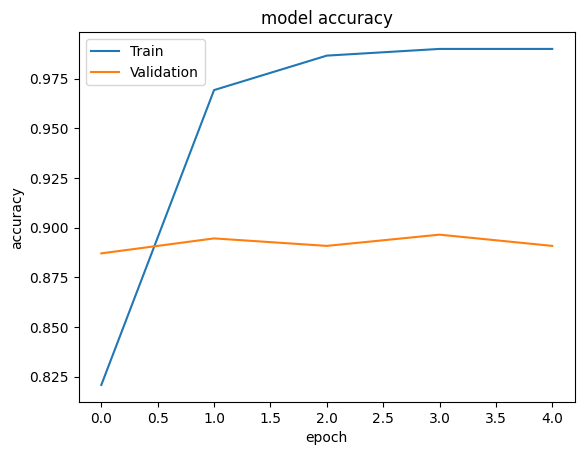

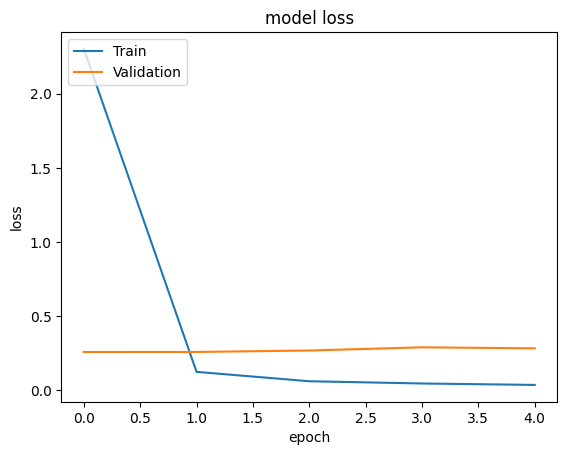

In [ ]:
#########################################################################################
#
#    Title: How to plot the accuracy and and loss from this Keras CNN model? [duplicate]
#    Author: Pooya Chavoshi (Edited: Trenton McKinney)
#    Date: March 28th, 2024
#    Code version: 1.0
#    Availability: https://stackoverflow.com/questions/66785014/how-to-plot-the-accuracy-and-and-loss-from-this-keras-cnn-model
#
#########################################################################################

import matplotlib.pyplot as plt

# Summarizing the model's accuracy history.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarizing the model's loss history.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Evaluating the model using the test set.

In [ ]:
# Evaluating the model on the test set.

model.evaluate(test_img, test_cat)

8/8 [==============================] - 3s 422ms/step - loss: 0.2944 - accuracy: 0.9004


[0.29442065954208374, 0.9004328846931458]

Generating predictions for confusion matrix generation.

In [ ]:
# Generating a set of predictions for confusion matrix creation.

predictions = model.predict(test_img[:])

8/8 [==============================] - 5s 557ms/step


Reformatting predictions into a matrix-parsable format.

In [ ]:
# Reformatting the predictions to confusion matrix-parsable format.

index = 0

for prediction in predictions:
  if prediction[0] > prediction [1]:
    predictions[index] = [1,0]
  elif prediction[0] < prediction[1]:
    predictions[index] = [0,1]

  index += 1

Generating the confusion matrix.

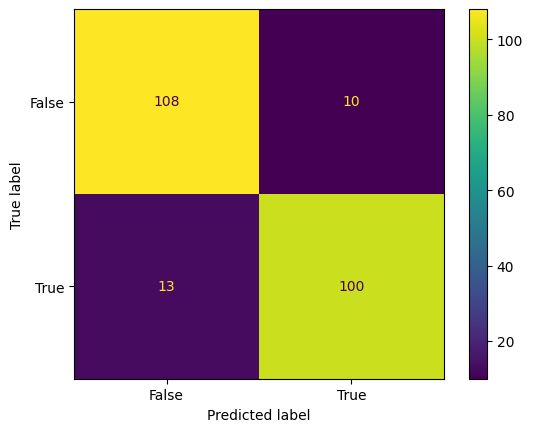

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generating confusion matrix to observe FN count. Looking to minimize this value.
cm = confusion_matrix(test_cat.argmax(axis=1), predictions.argmax(axis=1))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()

plt.show()